# NBA Hall of Fame Player Predictor (Updated Before the 2024-2025 Season)

In [1]:
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
from nba_api.stats.endpoints import playerawards 

import pandas as pd
import concurrent.futures
import numpy as np

### This program aims to predict whether or not a player will be inducted into the Hall of Fame based on their current achievements and career statistics
### Stats are imported from NBA_API

career_totals = pd.read_csv('playercareertotals.csv')
career_totals

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2,Byron Scott,1073.0,717.0,30152.0,5918.0,12268.0,0.482393,775.0,2093.0,...,0.832830,677.0,2310.0,2987.0,2729.0,1224.0,276.0,1597.0,2051.0,15097.0
1,3,Grant Long,1003.0,673.0,28518.0,3472.0,7440.0,0.466666,83.0,293.0,...,0.761308,2168.0,3986.0,6154.0,1716.0,1199.0,366.0,1628.0,2957.0,9518.0
2,7,Dan Schayes,1138.0,427.0,21976.0,2994.0,6228.0,0.480732,4.0,30.0,...,0.805547,1819.0,3852.0,5671.0,1299.0,560.0,840.0,1572.0,3494.0,8780.0
3,9,Sedale Threatt,951.0,304.0,22437.0,3914.0,8075.0,0.484705,188.0,642.0,...,0.815298,371.0,1338.0,1709.0,3613.0,1138.0,136.0,1296.0,2178.0,9327.0
4,12,Chris King,103.0,66.0,2058.0,271.0,640.0,0.423437,46.0,120.0,...,0.632530,108.0,203.0,311.0,116.0,74.0,34.0,119.0,183.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1642262,Cody Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5015,1642444,Jaylin Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5016,1629624,Kenny Wooten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5017,1642443,Jahmir Young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
### Function to easily search for NBA Player stats in the Data Frame based on their name
def player_locate(name):
    return career_totals.loc[career_totals["PLAYER_NAME"] == name]

### Manipulating the Data

In [3]:
### Viewing columns
career_totals.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
career_totals.drop('PF', axis = 1, inplace = True)

In [5]:
career_totals

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
0,2,Byron Scott,1073.0,717.0,30152.0,5918.0,12268.0,0.482393,775.0,2093.0,...,2985.0,0.832830,677.0,2310.0,2987.0,2729.0,1224.0,276.0,1597.0,15097.0
1,3,Grant Long,1003.0,673.0,28518.0,3472.0,7440.0,0.466666,83.0,293.0,...,3272.0,0.761308,2168.0,3986.0,6154.0,1716.0,1199.0,366.0,1628.0,9518.0
2,7,Dan Schayes,1138.0,427.0,21976.0,2994.0,6228.0,0.480732,4.0,30.0,...,3461.0,0.805547,1819.0,3852.0,5671.0,1299.0,560.0,840.0,1572.0,8780.0
3,9,Sedale Threatt,951.0,304.0,22437.0,3914.0,8075.0,0.484705,188.0,642.0,...,1608.0,0.815298,371.0,1338.0,1709.0,3613.0,1138.0,136.0,1296.0,9327.0
4,12,Chris King,103.0,66.0,2058.0,271.0,640.0,0.423437,46.0,120.0,...,166.0,0.632530,108.0,203.0,311.0,116.0,74.0,34.0,119.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1642262,Cody Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5015,1642444,Jaylin Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5016,1629624,Kenny Wooten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5017,1642443,Jahmir Young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
career_totals.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS'],
      dtype='object')

In [7]:
career_totals.drop(['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA'], axis = 1, inplace = True)

In [8]:
career_totals.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'GP', 'GS', 'MIN', 'FG_PCT', 'FG3_PCT',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS'],
      dtype='object')

In [9]:
career_totals

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
0,2,Byron Scott,1073.0,717.0,30152.0,0.482393,0.370281,0.832830,677.0,2310.0,2987.0,2729.0,1224.0,276.0,1597.0,15097.0
1,3,Grant Long,1003.0,673.0,28518.0,0.466666,0.283276,0.761308,2168.0,3986.0,6154.0,1716.0,1199.0,366.0,1628.0,9518.0
2,7,Dan Schayes,1138.0,427.0,21976.0,0.480732,0.133333,0.805547,1819.0,3852.0,5671.0,1299.0,560.0,840.0,1572.0,8780.0
3,9,Sedale Threatt,951.0,304.0,22437.0,0.484705,0.292834,0.815298,371.0,1338.0,1709.0,3613.0,1138.0,136.0,1296.0,9327.0
4,12,Chris King,103.0,66.0,2058.0,0.423437,0.383333,0.632530,108.0,203.0,311.0,116.0,74.0,34.0,119.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1642262,Cody Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5015,1642444,Jaylin Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5016,1629624,Kenny Wooten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5017,1642443,Jahmir Young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
career_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_ID    5019 non-null   int64  
 1   PLAYER_NAME  5019 non-null   object 
 2   GP           4897 non-null   float64
 3   GS           3499 non-null   float64
 4   MIN          4563 non-null   float64
 5   FG_PCT       4897 non-null   float64
 6   FG3_PCT      3366 non-null   float64
 7   FT_PCT       4897 non-null   float64
 8   OREB         3916 non-null   float64
 9   DREB         3916 non-null   float64
 10  REB          4605 non-null   float64
 11  AST          4897 non-null   float64
 12  STL          3916 non-null   float64
 13  BLK          3916 non-null   float64
 14  TOV          3714 non-null   float64
 15  PTS          4897 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 627.5+ KB


In [11]:
career_totals.describe()

,PLAYER_ID,GP,GS,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
count,5.019000e+03,4897.000000,3499.000000,4563.000000,4897.000000,3366.000000,4897.000000,3916.000000,3916.000000,4605.000000,4897.000000,3916.000000,3916.000000,3714.000000,4897.000000
mean,3.821515e+05,273.162957,141.645041,6805.684418,0.406905,0.226734,0.668254,350.173391,869.772983,1261.679045,624.764346,228.595761,141.928754,421.173129,2792.408413
std,6.182588e+05,312.145633,239.290290,9402.183313,0.112912,0.163325,0.204077,584.998108,1377.112948,2072.249831,1179.362699,348.497442,302.173619,633.160327,4558.363096
min,2.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.617250e+04,31.000000,0.000000,276.500000,0.364089,0.000000,0.616666,14.000000,32.000000,45.000000,17.000000,9.000000,4.000000,18.000000,86.000000
50%,7.771900e+04,131.000000,21.000000,2100.000000,0.423305,0.277996,0.714285,97.000000,246.000000,340.000000,127.000000,69.000000,30.000000,127.000000,643.000000
75%,2.028680e+05,456.000000,172.000000,10390.500000,0.466037,0.346400,0.784059,429.000000,1176.250000,1655.000000,677.000000,311.250000,143.000000,567.250000,3553.000000
max,1.642505e+06,1611.000000,1490.000000,57446.000000,1.000000,1.000000,1.000000,6731.000000,11453.000000,23924.000000,15806.000000,3265.000000,3830.000000,5211.000000,40474.000000


### Visualizing

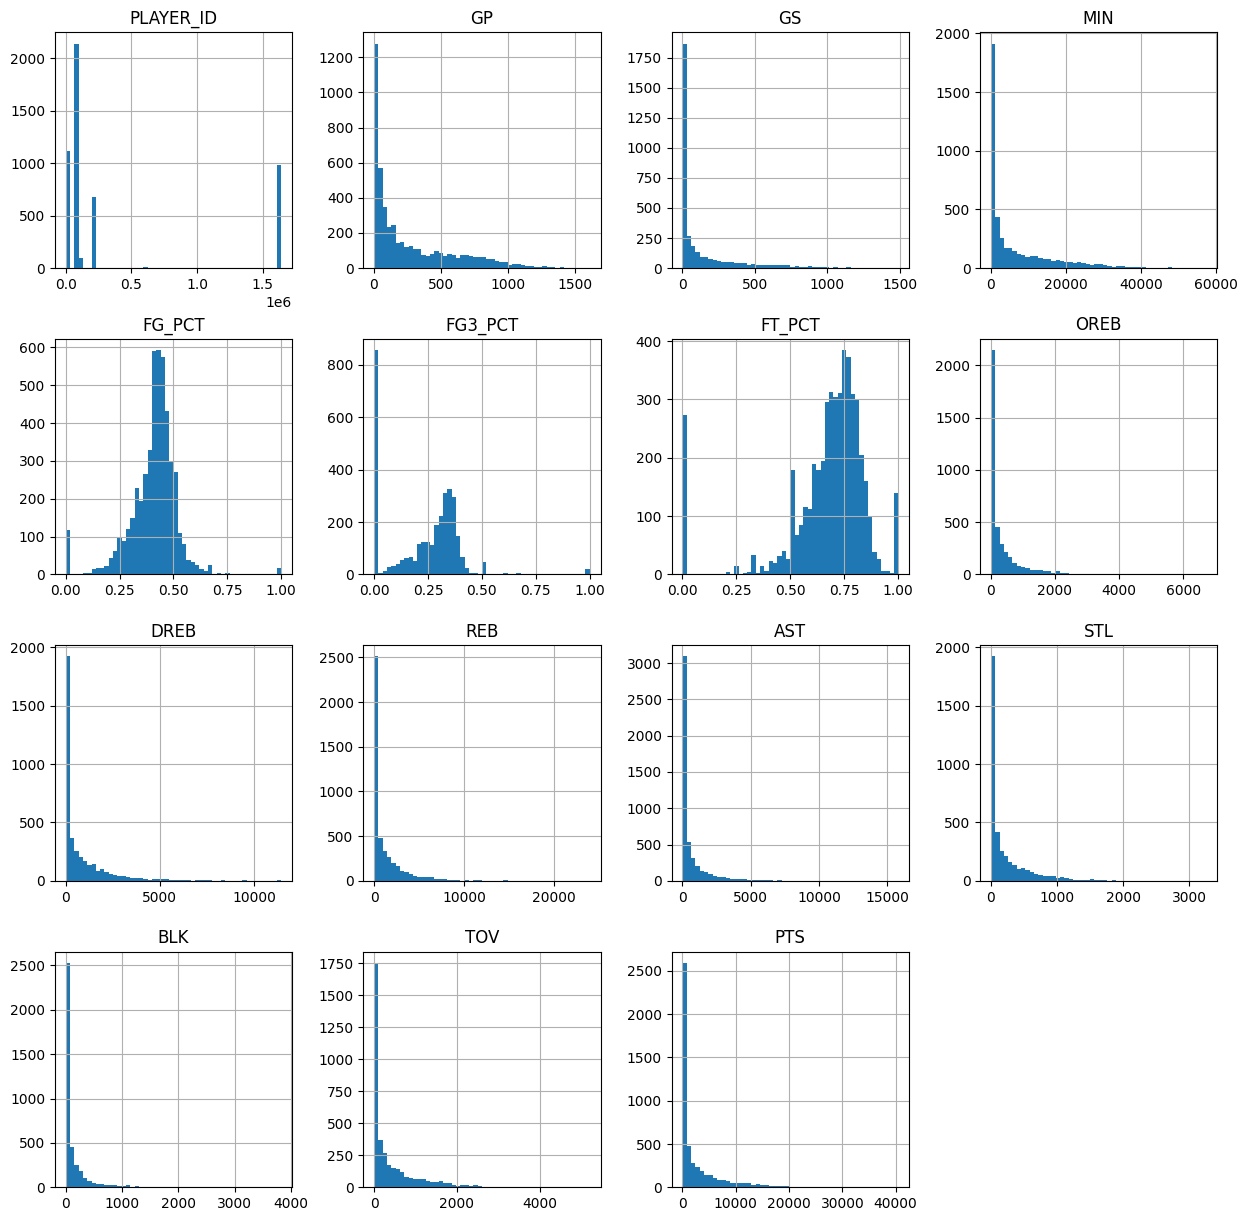

In [12]:
import matplotlib.pyplot as plt

career_totals.hist(bins = 50, figsize = (15,15))
plt.show()

In [13]:
hof_players = pd.read_csv('nba_hof_players.csv')
hof_players

,PLAYER_NAME,HOF
0,Kareem Abdul-Jabbar,1
1,Michael Jordan,1
2,Bill Russell,1
3,Kobe Bryant,1
4,Wilt Chamberlain,1
...,...,...
130,Gus Johnson,1
131,Doug Collins,1
132,Connie Hawkins,1
133,Don Nelson,1


In [14]:
career_totals = pd.merge(career_totals, hof_players, on='PLAYER_NAME', how='outer')
career_totals

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,HOF
0,2.0,Byron Scott,1073.0,717.0,30152.0,0.482393,0.370281,0.832830,677.0,2310.0,2987.0,2729.0,1224.0,276.0,1597.0,15097.0,NaN
1,3.0,Grant Long,1003.0,673.0,28518.0,0.466666,0.283276,0.761308,2168.0,3986.0,6154.0,1716.0,1199.0,366.0,1628.0,9518.0,NaN
2,7.0,Dan Schayes,1138.0,427.0,21976.0,0.480732,0.133333,0.805547,1819.0,3852.0,5671.0,1299.0,560.0,840.0,1572.0,8780.0,NaN
3,9.0,Sedale Threatt,951.0,304.0,22437.0,0.484705,0.292834,0.815298,371.0,1338.0,1709.0,3613.0,1138.0,136.0,1296.0,9327.0,NaN
4,12.0,Chris King,103.0,66.0,2058.0,0.423437,0.383333,0.632530,108.0,203.0,311.0,116.0,74.0,34.0,119.0,693.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,1641783.0,Tristan da Silva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5019,NaN,Tiny Archibald,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5020,NaN,Jo Jo White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5021,NaN,Manu Ginóbili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [15]:
career_totals.loc[career_totals['HOF'] == 1]

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,HOF
6,17.0,Clyde Drexler,1086.0,950.0,37538.0,0.471623,0.317710,0.787990,2615.0,4062.0,6677.0,6125.0,2207.0,719.0,2977.0,22195.0,1.0
9,23.0,Dennis Rodman,911.0,573.0,28842.0,0.520903,0.230985,0.583515,4329.0,7625.0,11954.0,1600.0,611.0,531.0,1484.0,6683.0,1.0
33,56.0,Gary Payton,1335.0,1231.0,47119.0,0.465718,0.317086,0.728794,1392.0,3877.0,5269.0,8966.0,2445.0,285.0,3030.0,21813.0,1.0
55,87.0,Dikembe Mutombo,1196.0,997.0,36798.0,0.518210,0.000000,0.683669,3808.0,8551.0,12359.0,1240.0,494.0,3289.0,2173.0,11729.0,1.0
77,121.0,Patrick Ewing,1183.0,1122.0,40594.0,0.504235,0.152000,0.739744,2752.0,8855.0,11607.0,2215.0,1136.0,2894.0,3537.0,24815.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,600015.0,Oscar Robertson,1040.0,NaN,43886.0,0.484607,NaN,0.837670,71.0,208.0,7804.0,9887.0,77.0,4.0,NaN,26710.0,1.0
5019,NaN,Tiny Archibald,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5020,NaN,Jo Jo White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5021,NaN,Manu Ginóbili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Changing Names for NaN players

In [16]:
career_totals.loc[career_totals['PLAYER_NAME'] == 'Nate Archibald', 'HOF'] = 1
career_totals.loc[career_totals['PLAYER_NAME'] == 'Jojo White', 'HOF'] = 1
career_totals.loc[career_totals['PLAYER_NAME'] == 'Manu Ginobili', 'HOF'] = 1
career_totals.loc[career_totals['PLAYER_NAME'] == 'Thomas Sanders', 'HOF'] = 1

In [17]:
career_totals = career_totals.drop(career_totals[career_totals['PLAYER_NAME'] == 'Tiny Archibald'].index[0])

In [18]:
career_totals = career_totals.drop(career_totals[career_totals['PLAYER_NAME'] == 'Jo Jo White'].index[0])
career_totals = career_totals.drop(career_totals[career_totals['PLAYER_NAME'] == 'Manu Ginóbili'].index[0])
career_totals = career_totals.drop(career_totals[career_totals['PLAYER_NAME'] == 'Tom Sanders'].index[0])

In [19]:
career_totals = career_totals.drop(career_totals[career_totals['PLAYER_ID'] == 201607.0].index[0])

In [20]:
df = career_totals

In [21]:
df.loc[df['HOF'] == 1]

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,HOF
6,17.0,Clyde Drexler,1086.0,950.0,37538.0,0.471623,0.317710,0.787990,2615.0,4062.0,6677.0,6125.0,2207.0,719.0,2977.0,22195.0,1.0
9,23.0,Dennis Rodman,911.0,573.0,28842.0,0.520903,0.230985,0.583515,4329.0,7625.0,11954.0,1600.0,611.0,531.0,1484.0,6683.0,1.0
33,56.0,Gary Payton,1335.0,1231.0,47119.0,0.465718,0.317086,0.728794,1392.0,3877.0,5269.0,8966.0,2445.0,285.0,3030.0,21813.0,1.0
55,87.0,Dikembe Mutombo,1196.0,997.0,36798.0,0.518210,0.000000,0.683669,3808.0,8551.0,12359.0,1240.0,494.0,3289.0,2173.0,11729.0,1.0
77,121.0,Patrick Ewing,1183.0,1122.0,40594.0,0.504235,0.152000,0.739744,2752.0,8855.0,11607.0,2215.0,1136.0,2894.0,3537.0,24815.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,600006.0,Earl Monroe,926.0,NaN,29636.0,0.463552,NaN,0.807001,260.0,976.0,2796.0,3594.0,473.0,121.0,305.0,17454.0,1.0
4030,600012.0,George Mikan,439.0,NaN,8350.0,0.403506,NaN,0.781855,NaN,NaN,4167.0,1245.0,NaN,NaN,NaN,10156.0,1.0
4031,600013.0,Rick Barry,794.0,NaN,28825.0,0.448679,NaN,0.899835,510.0,2366.0,5168.0,4017.0,1104.0,269.0,574.0,18395.0,1.0
4032,600014.0,Artis Gilmore,909.0,476.0,29685.0,0.598955,NaN,0.713245,2639.0,6522.0,9161.0,1777.0,470.0,1747.0,2347.0,15579.0,1.0


## Trying Model on Data (Imputed 0 for NaN)

In [22]:
df_1 = df
df_1['HOF'] = df_1['HOF'].fillna(0)

In [23]:
df_1 = df_1.dropna(subset=['GP'])
df_1

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,HOF
0,2.0,Byron Scott,1073.0,717.0,30152.0,0.482393,0.370281,0.832830,677.0,2310.0,2987.0,2729.0,1224.0,276.0,1597.0,15097.0,0.0
1,3.0,Grant Long,1003.0,673.0,28518.0,0.466666,0.283276,0.761308,2168.0,3986.0,6154.0,1716.0,1199.0,366.0,1628.0,9518.0,0.0
2,7.0,Dan Schayes,1138.0,427.0,21976.0,0.480732,0.133333,0.805547,1819.0,3852.0,5671.0,1299.0,560.0,840.0,1572.0,8780.0,0.0
3,9.0,Sedale Threatt,951.0,304.0,22437.0,0.484705,0.292834,0.815298,371.0,1338.0,1709.0,3613.0,1138.0,136.0,1296.0,9327.0,0.0
4,12.0,Chris King,103.0,66.0,2058.0,0.423437,0.383333,0.632530,108.0,203.0,311.0,116.0,74.0,34.0,119.0,693.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,1641926.0,Dexter Dennis,4.0,0.0,30.0,0.526315,0.125000,0.333333,1.0,8.0,9.0,4.0,0.0,1.0,3.0,22.0,0.0
4895,1641931.0,Onuralp Bitim,23.0,1.0,268.0,0.380952,0.272727,0.800000,6.0,26.0,32.0,13.0,3.0,2.0,10.0,80.0,0.0
4896,1641970.0,Maozinha Pereira,7.0,1.0,122.0,0.514285,0.384615,0.700000,11.0,26.0,37.0,2.0,6.0,4.0,5.0,48.0,0.0
4897,1641998.0,Trey Jemison,25.0,14.0,574.0,0.551470,0.000000,0.840000,64.0,70.0,134.0,27.0,12.0,28.0,34.0,171.0,0.0


In [24]:
df_1 = df_1.fillna(0)
df_1.loc[df_1['HOF'] == 1]

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,HOF
6,17.0,Clyde Drexler,1086.0,950.0,37538.0,0.471623,0.317710,0.787990,2615.0,4062.0,6677.0,6125.0,2207.0,719.0,2977.0,22195.0,1.0
9,23.0,Dennis Rodman,911.0,573.0,28842.0,0.520903,0.230985,0.583515,4329.0,7625.0,11954.0,1600.0,611.0,531.0,1484.0,6683.0,1.0
33,56.0,Gary Payton,1335.0,1231.0,47119.0,0.465718,0.317086,0.728794,1392.0,3877.0,5269.0,8966.0,2445.0,285.0,3030.0,21813.0,1.0
55,87.0,Dikembe Mutombo,1196.0,997.0,36798.0,0.518210,0.000000,0.683669,3808.0,8551.0,12359.0,1240.0,494.0,3289.0,2173.0,11729.0,1.0
77,121.0,Patrick Ewing,1183.0,1122.0,40594.0,0.504235,0.152000,0.739744,2752.0,8855.0,11607.0,2215.0,1136.0,2894.0,3537.0,24815.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,600006.0,Earl Monroe,926.0,0.0,29636.0,0.463552,0.000000,0.807001,260.0,976.0,2796.0,3594.0,473.0,121.0,305.0,17454.0,1.0
4030,600012.0,George Mikan,439.0,0.0,8350.0,0.403506,0.000000,0.781855,0.0,0.0,4167.0,1245.0,0.0,0.0,0.0,10156.0,1.0
4031,600013.0,Rick Barry,794.0,0.0,28825.0,0.448679,0.000000,0.899835,510.0,2366.0,5168.0,4017.0,1104.0,269.0,574.0,18395.0,1.0
4032,600014.0,Artis Gilmore,909.0,476.0,29685.0,0.598955,0.000000,0.713245,2639.0,6522.0,9161.0,1777.0,470.0,1747.0,2347.0,15579.0,1.0


### Creating Train/Test Split for the Model

In [25]:
from sklearn.model_selection import train_test_split

x = df_1.drop(columns=['HOF'])
y = df_1['HOF']

In [26]:
x

,PLAYER_ID,PLAYER_NAME,GP,GS,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
0,2.0,Byron Scott,1073.0,717.0,30152.0,0.482393,0.370281,0.832830,677.0,2310.0,2987.0,2729.0,1224.0,276.0,1597.0,15097.0
1,3.0,Grant Long,1003.0,673.0,28518.0,0.466666,0.283276,0.761308,2168.0,3986.0,6154.0,1716.0,1199.0,366.0,1628.0,9518.0
2,7.0,Dan Schayes,1138.0,427.0,21976.0,0.480732,0.133333,0.805547,1819.0,3852.0,5671.0,1299.0,560.0,840.0,1572.0,8780.0
3,9.0,Sedale Threatt,951.0,304.0,22437.0,0.484705,0.292834,0.815298,371.0,1338.0,1709.0,3613.0,1138.0,136.0,1296.0,9327.0
4,12.0,Chris King,103.0,66.0,2058.0,0.423437,0.383333,0.632530,108.0,203.0,311.0,116.0,74.0,34.0,119.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,1641926.0,Dexter Dennis,4.0,0.0,30.0,0.526315,0.125000,0.333333,1.0,8.0,9.0,4.0,0.0,1.0,3.0,22.0
4895,1641931.0,Onuralp Bitim,23.0,1.0,268.0,0.380952,0.272727,0.800000,6.0,26.0,32.0,13.0,3.0,2.0,10.0,80.0
4896,1641970.0,Maozinha Pereira,7.0,1.0,122.0,0.514285,0.384615,0.700000,11.0,26.0,37.0,2.0,6.0,4.0,5.0,48.0
4897,1641998.0,Trey Jemison,25.0,14.0,574.0,0.551470,0.000000,0.840000,64.0,70.0,134.0,27.0,12.0,28.0,34.0,171.0


In [27]:
print(len(x))
print(len(y))

4896
4896


In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['PLAYER_NAME'] = label_encoder.fit_transform(x['PLAYER_NAME'])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 21)

In [30]:
print(x.dtypes)

PLAYER_ID      float64
PLAYER_NAME      int64
GP             float64
GS             float64
MIN            float64
FG_PCT         float64
FG3_PCT        float64
FT_PCT         float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
PTS            float64
dtype: object


In [31]:
print(len(x_train))
print(len(y_train))

3916
3916


In [32]:
print(len(x_test))
print(len(y_test))

980
980


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df_1_model = RandomForestClassifier(n_estimators=100, random_state= 21)
df_1_model.fit(x_train, y_train)

RandomForestClassifier(random_state=21)

In [34]:
y_pred = df_1_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9816326530612245

In [35]:
### Accuracy is a bad metric. Realistically, the model could just predict that players wont make the HOF for every instance
### and the model would be correct the majority of the time, since most players don't make the Hall of Fame

In [36]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
precision

0.7

In [37]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix

# Predict probabilities
y_pred_proba = df_1_model.predict_proba(x_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

ROC AUC: 0.9639
F1 Score: 0.6087
Recall: 0.5385
Confusion Matrix:
[[948   6]
 [ 12  14]]


In [38]:
### ROC AUC (Receiver Operating Characteristic - Area Under Curve) - A value of 0.95+ is excellent, meaning your model ranks HOF players higher than non-HOF players >95% of the time
    ### ROC AUC is 0.9639: Means that if I randomly select one HOF player and one non-HOF player, 
    ### the model will assign a higher probability to the HOF player approximately 96% of the time

### F1 Score - Balances ability to find HOF players (recall) with your precision in making those predictions
    ### F1 Score is 0.6087: Means that the model has a good balance between correctly identifying 
    ### HOF players while not incorrectly classifying too many non-HOF players as HOF.

### Recall - High recall means you're successfully identifying most HOF players
    ### Recall is 0.5385: Means that the model succeffully identified 53.85% of all actual Hall of Famers
    ### This score is very bad. NEED TO FURTHER TUNE THE MODEL

### Confusion Matrix - A 2×2 table showing:
    ### True Positives (TP): Correctly predicted HOF players (14)
    ### False Positives (FP): Incorrectly predicted non-HOF players as HOF (6)
    ### True Negatives (TN): Correctly predicted non-HOF players (948)
    ### False Negatives (FN): Incorrectly predicted HOF players as non-HOF (12)

In [39]:
### Very imbalanced Dataset for training data: 954 Non-HOFers vs 26 HOFers
### The model is VERY selective in determining HOF status. It only predicted 6 Non-HOFers to be HOFers
### Conservative model, which isn't the worst thing given the Basketball HOF is a prestigious honor
    ### Add player achievements and accolades. This may help the classifier

In [41]:
# Get predictions for the test set
y_pred = df_1_model.predict(x_test)

# Create a DataFrame with test data including player names
test_results = x_test.copy()
test_results['Actual_HOF'] = y_test.values
test_results['Predicted_HOF'] = y_pred

# Find false positives (players predicted as HOF but aren't actually HOF)
false_positives = test_results[(test_results['Predicted_HOF'] == 1) & (test_results['Actual_HOF'] == 0)]

# If you need to decode the player names back to their original form
player_names = label_encoder.inverse_transform(false_positives['PLAYER_NAME'])
false_positives['Original_Name'] = player_names

# Display the false positives with relevant stats
false_positive_players = false_positives[['Original_Name', 'PTS', 'REB', 'AST', 'GP']]  # Add other columns of interest
print("False Positives (Players incorrectly predicted as HOF):")
print(false_positive_players)

False Positives (Players incorrectly predicted as HOF):
       Original_Name      PTS      REB     AST      GP
2274  Kevin Loughery  11575.0   2254.0  2803.0   755.0
388      Otis Thorpe  17599.0  10370.0  2730.0  1257.0
2871      Paul Silas  11782.0  12357.0  2572.0  1254.0
2996    Reggie Theus  19015.0   3349.0  6453.0  1026.0
2862       Gene Shue  10068.0   2855.0  2608.0   699.0
2505   Willie Naulls  11305.0   6508.0  1114.0   716.0


/var/folders/9h/cxqh168x79qbmfkg0f50mqdw0000gn/T/ipykernel_23047/1976253218.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_positives['Original_Name'] = player_names


In [42]:
df_1_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}

In [43]:
# Get the feature importances from the model
importances = df_1_model.feature_importances_

# Display feature importances
for feature, importance in zip(x.columns, importances):
    print(f'{feature}: {importance:.4f}')

PLAYER_ID: 0.0358
PLAYER_NAME: 0.0241
GP: 0.0482
GS: 0.0513
MIN: 0.1445
FG_PCT: 0.0409
FG3_PCT: 0.0339
FT_PCT: 0.0364
OREB: 0.0404
DREB: 0.0426
REB: 0.0901
AST: 0.0658
STL: 0.0531
BLK: 0.0392
TOV: 0.0779
PTS: 0.1759


/var/folders/9h/cxqh168x79qbmfkg0f50mqdw0000gn/T/ipykernel_23047/2283842031.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


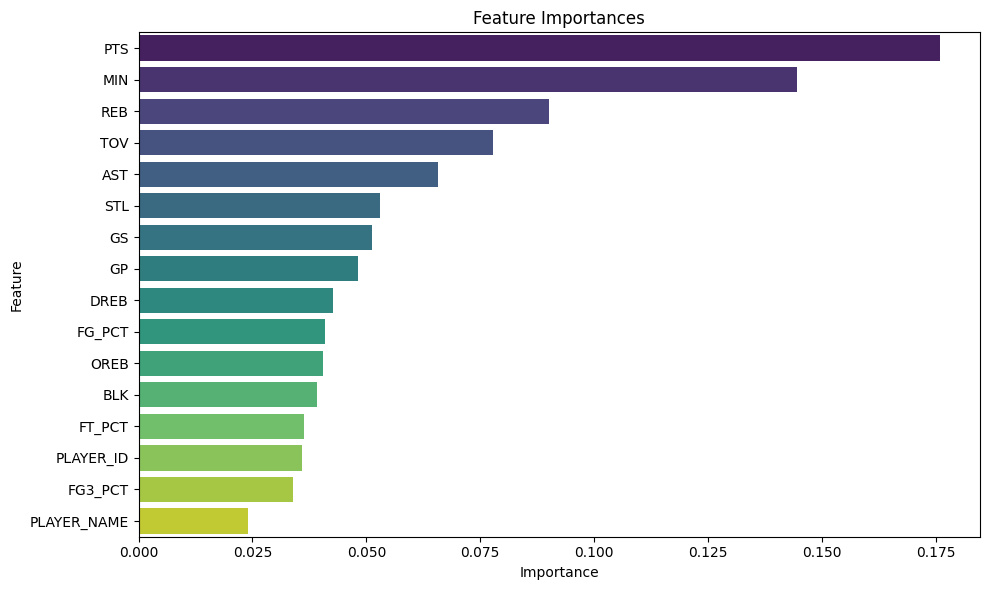

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data: Feature names and importances
features = ['PLAYER_ID', 'PLAYER_NAME', 'GP', 'GS', 'MIN', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 
            'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']
importances = [0.0358, 0.0241, 0.0482, 0.0513, 0.1445, 0.0409, 0.0339, 0.0364, 0.0404, 
               0.0426, 0.0901, 0.0658, 0.0531, 0.0392, 0.0779, 0.1759]

# Create a DataFrame for better handling
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Customize the plot
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.tight_layout()
plt.savefig('/Users/aaronkashian/NBA_Predicting_HOF.png')

In [ ]:
### How many years did a player lead the league in a certain stat
### League leaders
### Number of years active
### Check for number of years player has been out of the league